# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

## The Sparks Foundation

## <span style="color:blue">Prediction using Supervised ML</span>

### <span style="color:green">TASK1</span> : Predict the percentage of a student based on the no. of study hours

## <span style="color:blue">Presented By:- MANISH BHATIA</span>


### 1. To import required libraries in order to perform the task

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
%matplotlib inline


### 2. To extract data from CSV url and convert it into a Dataframe

#### # provided URL is 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'


In [25]:
# As data is in CSV format so read_csv method is used to read the data from URL
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')


### 3. To display top 5 rows of the datset created above using head()

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 4. info() function provides information about the columns formats, their count

In [4]:
data.info()
#As per the results Hours format is float and scores are in integer format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 5. isnull() function helps in identifying if any column is having null values

In [5]:
data.isnull().sum()


Hours     0
Scores    0
dtype: int64

#### as per the result there are no null values in the dataset

### 6. describe() function helps to provide overview of statistical representation of dataset

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

### 7. Line Plot is used as the probem statement indicated regression to check correlation of variables

Text(3.924999999999997, 0.5, 'Scores_Obtained')

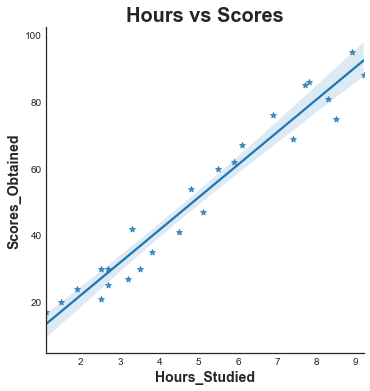

In [7]:
sns.lmplot(x = 'Hours',y = 'Scores',data = data,markers='*')
plt.title("Hours vs Scores",fontweight="bold",fontsize = 20)
plt.xlabel("Hours_Studied",fontweight="bold",fontsize = 14)
plt.ylabel("Scores_Obtained",fontweight="bold",fontsize = 14)

####   <span style="color:blue">Graph inticate that correlation is positive between Hours studied  and scores obtained</span>

### 8. Heatmap is used along with correlation to check how variables are related

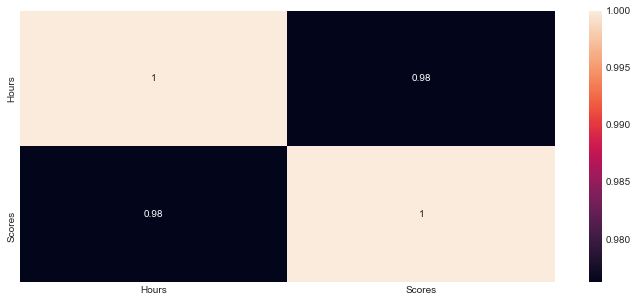

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

### 9. Data preparation- separating Dependent and independent Variables

##### as 'Scores' is our target variable so will be removed from features set(X) and will be added in 'Dependent variable' denoted as y

In [26]:
y = data['Scores']
X= data.loc[:, data.columns != 'Scores']
print(X.shape)
print(y.shape)
X.head()

(25, 1)
(25,)


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


### 10. Split the data into Train and Test Sets using train_test_split from sklearn.model_selection

#### Test size is considered as 20% 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 0)
print(X_train.shape,y_train.shape )
print(X_test.shape,y_test.shape )

(20, 1) (20,)
(5, 1) (5,)


### 11. After spliting, the Linearregression model is fitted on Train Data

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


### 12. once Model is fitted on train data- prediction is first performed on test data

In [ ]:
yhat=lr.predict(X_test)

In [19]:
df1 = pd.DataFrame({'predicted_Score':yhat,"Actual Score":y_test})
df1

,predicted_Score,Actual Score
5,16.884145,20
2,33.732261,27
19,75.357018,69
16,26.794801,30
11,60.491033,62


### 13. As model is trained , now prediction is made on given values of Hours = 9.25

In [23]:
to_pred_hour = 9.25
predicted_Score = lr.predict([[to_pred_hour]])
print("Predicted Score for studied hours=9.25 is: %.2f" % predicted_Score[0])

Predicted Score for studied hours=9.25 is: 93.69


### Result indicates that Predicted score after studying <span style="color:red">9.25 Hours</span> is   <span style="color:red">93.69</span>

### 14. Evaluation parameters for the Trained model is 

In [18]:
#print result of RMSE
from sklearn import metrics
from sklearn.metrics import r2_score
print("mean square error is: %.2f" % metrics.mean_squared_error(y_test,yhat))
print("R2-score: %.2f" % metrics.r2_score(y_test,yhat) )
print("mean Absolute error is: %.2f" %  metrics.mean_absolute_error(y_test,yhat))

mean square error is: 21.60
R2-score: 0.95
mean Absolute error is: 4.18
